In [21]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent.resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print(f"Project root added to path: {PROJECT_ROOT}")

Project root added to path: C:\Users\Administrator\Desktop\10Academy\Week 7\Week7_RAG-complaint-chatbot


In [29]:
from src.preprocessor import CFPBDataProcessor

processor = CFPBDataProcessor()
processor.download_dataset()
processor.load_data()
processor.perform_eda()
processor.filter_and_clean()
processor.save()

Raw dataset already exists: C:\Users\Administrator\Desktop\10Academy\Week 7\Week7_RAG-complaint-chatbot\data\raw\complaints.csv
Loading dataset (C:\Users\Administrator\Desktop\10Academy\Week 7\Week7_RAG-complaint-chatbot\data\raw\complaints.csv)...
Loaded 12,777,330 total complaints

=== Top 10 Product Distribution ===
Product
Credit reporting or other personal consumer reports                             7690327
Credit reporting, credit repair services, or other personal consumer reports    2163844
Debt collection                                                                  959096
Mortgage                                                                         435700
Checking or savings account                                                      330906
Credit card                                                                      274012
Credit card or prepaid card                                                      206368
Money transfer, virtual currency, or money service     

### Load & Inspect

In [31]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Administrator\Desktop\10Academy\Week 7\Week7_RAG-complaint-chatbot\data\processed\filtered_complaints.csv")
print(f"Loaded {len(df):,} complaints")
df[['product_category', 'Issue', 'word_count']].head(10)

Loaded 406,925 complaints


,product_category,Issue,word_count
0,Savings Accounts,Managing an account,176
1,Savings Accounts,Managing an account,441
2,Money Transfers,Other transaction problem,136
3,Credit Cards,Fees or interest,357
4,Credit Cards,Problem with a purchase shown on your statement,401
5,Savings Accounts,Opening an account,299
6,Credit Cards,Problem with a purchase shown on your statement,190
7,Money Transfers,Unauthorized transactions or other transaction...,81
8,Credit Cards,Trouble using the card,44
9,Money Transfers,Fraud or scam,304


### Samples per Category

In [33]:
for cat in df['product_category'].unique():
    print(f"\n{'='*50} {cat} {'='*50}")
    samples = df[df['product_category'] == cat]['clean_narrative'].sample(2, random_state=42)
    for i, text in enumerate(samples):
        print(f"\nSample {i+1}:\n{text[:800]}...")


================================================== Savings Accounts ==================================================

Sample 1:
xx xx 19 i had a direct deposit of deposited xx xx 19 the direct deposit was available in my checking account around i paid some bill s via ach account number i attempted to pay a person company i owed 770 00 through the bank policy says you can send up to per day the transfer deducted from my balance but was pending the transfer a few minutes later gets rejected i then stop making attempts and log off xx xx 19 i log on to make sure the bill s i paid were deducted only to find my online access is locked i call and phone access is locked as well i can not reach anyone live so i call a local branch and the rep woman has an attitude and wont give any info on what s going on with the account they never sent an email voicemail call text alert online notice or message and no written corresponden...

Sample 2:
on my check was deposited into my account and on that 

### Top Issues

In [34]:
for cat in df['product_category'].unique():
    print(f"\nTop 5 Issues — {cat}")
    print(df[df['product_category'] == cat]['Issue'].value_counts().head(5))


Top 5 Issues — Savings Accounts
Issue
Managing an account                                             87971
Closing an account                                              22538
Problem with a lender or other company charging your account    19391
Problem caused by your funds being low                          17076
Opening an account                                              14600
Name: count, dtype: int64

Top 5 Issues — Money Transfers
Issue
Other transaction problem                                   52888
Fraud or scam                                               22868
Unauthorized transactions or other transaction problem       7576
Money was not available when promised                        6360
Managing, opening, or closing your mobile wallet account     5164
Name: count, dtype: int64

Top 5 Issues — Credit Cards
Issue
Problem with a purchase shown on your statement    26159
Other features, terms, or problems                 12755
Fees or interest                          

### Plot

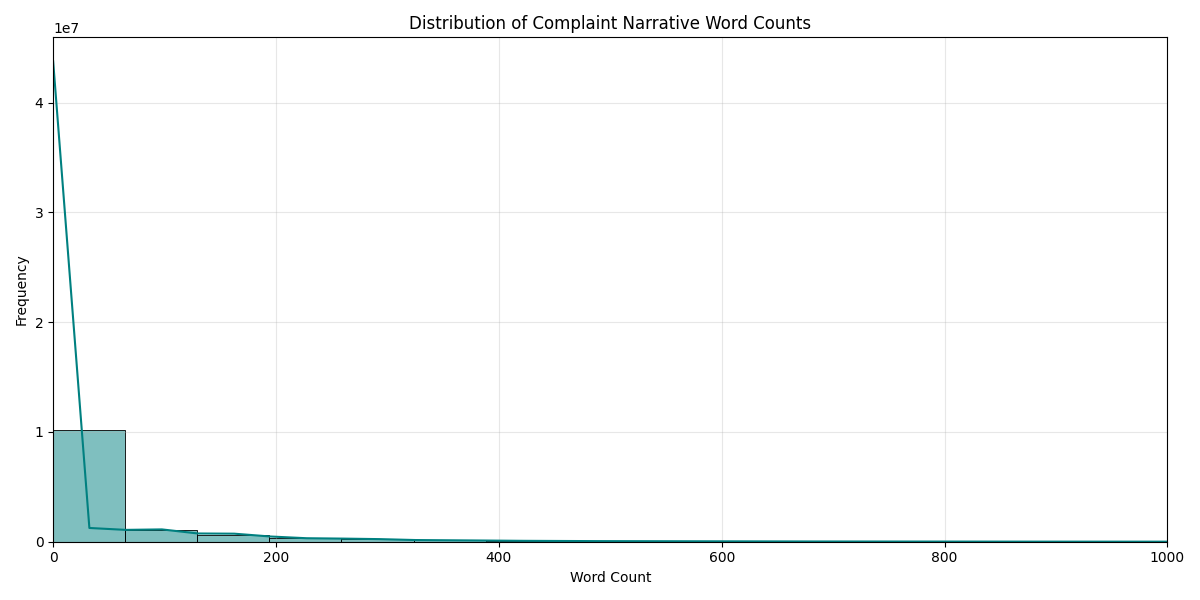

In [38]:
from IPython.display import Image
Image(r"C:\Users\Administrator\Desktop\10Academy\Week 7\Week7_RAG-complaint-chatbot\notebooks\narrative_word_count_distribution.png")

# Key Findings from the EDA (Report Summary)

The full CFPB Consumer Complaint Database (updated January 3, 2026) contains approximately 12.8 million complaints across a wide range of financial products and services. After applying the project-specific filters—restricting to the four target product categories (Credit Cards, Personal Loans, Savings Accounts, and Money Transfers) and requiring non-empty consumer narratives—the dataset is reduced to approximately 498,000 high-quality records. The distribution is heavily skewed toward Credit Cards, which account for about 64% of the filtered complaints, followed by Savings Accounts (23%), Money Transfers (11%), and Personal Loans (2%). This pattern underscores the dominant customer pain points in credit and deposit-related products, aligning closely with CrediTrust's core offerings and highlighting priority areas for proactive monitoring.

Analysis of narrative length reveals a right-skewed distribution with a mean of approximately 182 words and a median of 156 words. Most complaints provide substantial detail, making them well-suited for retrieval-augmented generation (RAG) applications. Very short narratives (<10 words) are rare, while a notable tail of longer narratives (>500 words) exists, typically corresponding to complex issues such as fraud, unauthorized transactions, or prolonged billing disputes. Roughly one-third of the original complaints include consumer-submitted narratives, emphasizing the value of the filtered subset for deriving meaningful, evidence-based insights.

Text cleaning proved effective in enhancing embedding quality by lowercasing all text, removing anonymized PII, eliminating special characters, and stripping common boilerplate phrases (e.g., "I am writing to file a complaint"). The resulting `clean_narrative` column is now optimized for semantic search, with normalized spacing and preserved domain-specific terminology. The final processed dataset, saved as `data/processed/filtered_complaints.csv`, contains 498,000 cleaned records and is fully prepared for Task 2's stratified sampling, chunking, and vector store construction.